In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_data, city_data, on = "city", how ="left")

# Display the data table for preview

ride_data.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [2]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

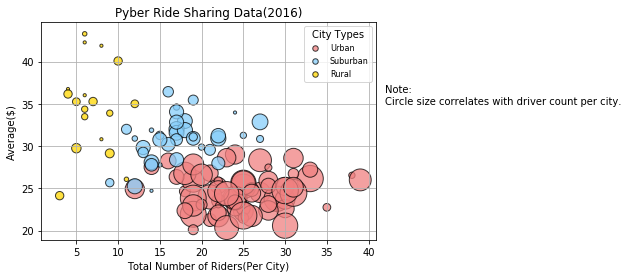

In [70]:
# Obtain the x and y coordinates for each of the three city types
urban_city_type = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
suburban_city_type = pyber_df[pyber_df["type"] == "Suburban"].groupby([pyber_df["city"]])
rural_city_type = pyber_df[pyber_df["type"] == "Rural"].groupby([pyber_df["city"]])

#Urban Calculations of X,Y and mean.
x_urban_ride = urban_city_type["ride_id"].count()
y_urban_fare = urban_city_type["fare"].mean()
z_urban_driver = urban_city_type["driver_count"].mean()

x_suburban_ride = suburban_city_type["ride_id"].count()
y_suburban_fare = suburban_city_type["fare"].mean()
z_suburban_driver = suburban_city_type["driver_count"].mean()

x_rural_ride = rural_city_type["ride_id"].count()
y_rural_fare = rural_city_type["fare"].mean()
z_rural_driver = rural_city_type["driver_count"].mean()


# Build the scatter plots for each city types
#plt.scatter(x_urban_ride, y_urban_fare, label = "Urban", s = z_urban_driver * 12, color = ["lightcoral"], edgecolor = "black", alpha = 0.75, marker = "0")
#plt.scatter(x_suburban_ride, y_suburban_fare, label = "Suburban", s = z_suburban_driver * 12, color = ["lightskyblue"], edgecolor = "black", alpha = 0.75, marker = "0")
#plt.scatter(x_rural_ride, y_rural_fare, label = "Rural", s = z_rural_driver * 12, color = ["gold"], edgecolor = "black", alpha = 0.75, marker = "0")
#plt.grid()
plt.scatter(x_urban_ride, y_urban_fare, label = "Urban", s = z_urban_driver * 10, color = ["lightcoral"], edgecolor = "black", alpha = 0.75, marker = "o")
plt.scatter(x_suburban_ride, y_suburban_fare, label = "Suburban", s= z_suburban_driver  * 10, color = ["lightskyblue"], edgecolor= "black", alpha = 0.75, marker = "o")
plt.scatter(x_rural_ride, y_rural_fare, label = "Rural", s = z_rural_driver * 10, color = ["gold"], edgecolor = "black", alpha = 0.75, marker = "o")
plt.grid()


# Incorporate the other graph properties
plt.xlabel("Total Number of Riders(Per City)")
plt.ylabel("Average($)")
plt.title("Pyber Ride Sharing Data(2016)")

# Create a legend
legend = plt.legend(fontsize = 8, title = "City Types", loc = "best")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

#Save Image
plt.savefig("../Images/Pyber Ride Sharing Data(2016)")

#show plt
plt.show()


In [29]:
# Show plot
plt.show()

## Total Fares by City Type

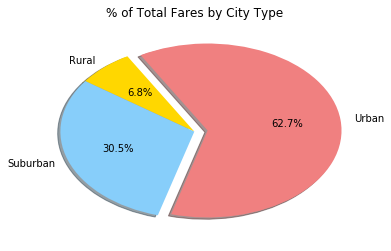

In [71]:
# Calculate Type Percents
type_group = pyber_df.groupby(["type"])
total_fare = type_group["fare"].sum()

urban_city_type1 = pyber_df[pyber_df["type"] == "Urban"]
suburban_city_type1 = pyber_df[pyber_df["type"] == "Suburban"]
rural_city_type1 = pyber_df[pyber_df["type"] == "Rural"]

urban_fare = urban_city_type1['fare'].sum()
suburban_fare = suburban_city_type1['fare'].sum()
rural_fare = rural_city_type1['fare'].sum()

urban_percentage = urban_fare/total_fare*100
suburban_percentage = suburban_fare/total_fare*100
rural_percentage = rural_fare/total_fare*100

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = [rural_percentage, suburban_percentage,urban_percentage ]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_fare,explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 120)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/TotalFarebyCityType.png")


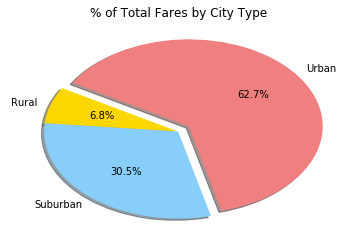

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

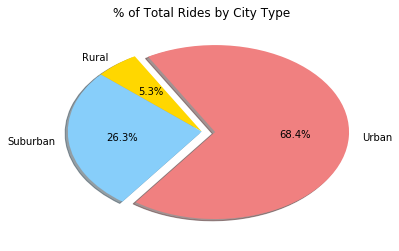

In [72]:
# Calculate Ride Percents
total_rides = type_group["ride_id"].count()


urban_rides1 = pyber_df[pyber_df["type"] == "Urban"]
suburban_rides1 = pyber_df[pyber_df["type"] == "Suburban"]
rural_rides1 = pyber_df[pyber_df["type"] == "Rural"]

urban_rides = urban_rides1["ride_id"].count()
suburban_rides = suburban_rides1["ride_id"].count()
rural_rides = rural_rides1["ride_id"].count()


urban_perc = urban_rides/total_rides*100
suburban_perc = suburban_rides/total_rides*100
rural_perc = rural_rides/total_fare*100
 
# Build Pie Chart
labels = ["Rural", "Suburban","Urban"]
explode = (0, 0, 0.1)
sizes = [urban_perc, suburban_perc, rural_perc]

colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_rides, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 120)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/TotalRidesbyCities.png")

plt.show()

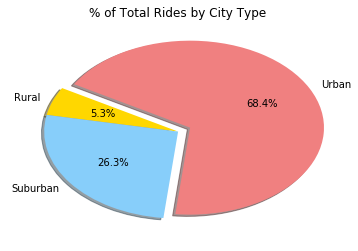

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

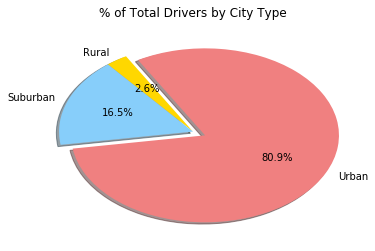

In [68]:
# Calculate Driver Percents
type_group_drivers = city_data.groupby(["type"])
total_drivers = type_group_drivers["driver_count"].sum()
                                  
# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)

colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_drivers, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 120)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Image/TotalDriverbyCityType")
                                  
plt.show()                                 

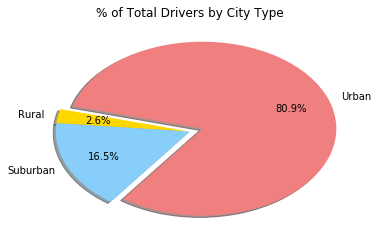

In [6]:
# Show Figure
plt.show()